In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense, Dropout

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Crop_recommendation.csv']))
print(df)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df['label'] = df['label'].replace([
  'apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
  'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
  'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
  'pigeonpeas', 'pomegranate', 'rice', 'watermelon'
  ], [
  'Apel', 'Pisang', 'Blackgram', 'Buncis', 'Kelapa', 'Kopi', 
  'Kapas', 'Anggur', 'Goni', 'Kacang Merah', 'Miju-miju', 'Jagung', 
  'Mangga', 'Mothbeans', 'Kacang Hijau', 'Melon', 'Jeruk', 'Pepaya', 
  'Kacang Gude', 'Delima', 'Padi', 'Semangka'])

In [ ]:
df.columns = ['Nitrogen', 'Fosfor', 'Kalium', 'Suhu', 'Kelembaban', 'pH', 'Curah Hujan', 'Tanaman']
df.head()

,Nitrogen,Fosfor,Kalium,Suhu,Kelembaban,pH,Curah Hujan,Tanaman
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Padi


In [ ]:
df.isnull().sum()

Nitrogen       0
Fosfor         0
Kalium         0
Suhu           0
Kelembaban     0
pH             0
Curah Hujan    0
Tanaman        0
dtype: int64

## EDA

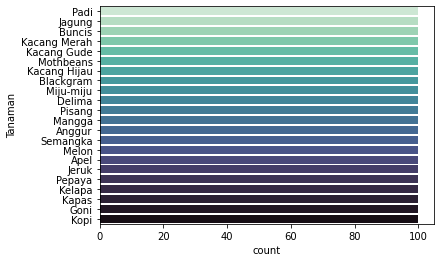

In [ ]:
sns.countplot(y='Tanaman',data=df, palette="mako_r")

In [ ]:
import plotly.graph_objects as go

df2 = df.copy()

dfg = pd.DataFrame({'Tanaman':df2['Tanaman'].unique()})
dfg['dummy'] = dfg.index
df2 = pd.merge(df2, dfg, on = 'Tanaman', how='left')

dimensions = list([dict(range=[0,df2['dummy'].max()], tickvals = dfg['dummy'], 
                        ticktext = dfg['Tanaman'], label='Tanaman', values=df2['dummy']),
                   dict(range=[df2['Nitrogen'].min(), df2['Nitrogen'].max()], 
                        label='Nitrogen', values=df2['Nitrogen']),
                   dict(range=[df2['Fosfor'].min(), df2['Fosfor'].max()], 
                        label='Fosfor', values=df2['Fosfor']),
                   dict(range=[df2['Kalium'].min(), df2['Kalium'].max()], 
                        label='Kalium', values=df2['Kalium']),
                   dict(range=[df2['Suhu'].min(), df2['Suhu'].max()], 
                        label='Suhu', values=df2['Suhu']),
                   dict(range=[df2['Kelembaban'].min(), df2['Kelembaban'].max()], 
                        label='Kelembaban', values=df2['Kelembaban']),
                   dict(range=[df2['pH'].min(),df2['pH'].max()], 
                        label='pH', values=df2['pH']),
                   dict(range=[df2['Curah Hujan'].min(),df2['Curah Hujan'].max()], 
                        label='Curah Hujan', values=df2['Curah Hujan'])])

fig = go.Figure(data=go.Parcoords(line = dict(color = df2['dummy'], colorscale = 'magma'), 
                                  dimensions=dimensions))
fig.update_layout(height = 550, width = 1000, title='Crop Feature Distribution', 
                  title_font_size=20, title_x=0.5, title_y=0.95)
fig.show()

In [ ]:
grouped = df.groupby(by='Tanaman').mean().reset_index()
grouped

,Tanaman,Nitrogen,Fosfor,Kalium,Suhu,Kelembaban,pH,Curah Hujan
0,Anggur,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
1,Apel,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
2,Blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,Buncis,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,Delima,18.87,18.75,40.21,21.837842,90.125504,6.429172,107.528442
5,Goni,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
6,Jagung,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
7,Jeruk,19.58,16.55,10.01,22.765725,92.170209,7.016957,110.474969
8,Kacang Gude,20.73,67.73,20.29,27.741762,48.061633,5.794175,149.457564
9,Kacang Hijau,20.99,47.28,19.87,28.525775,85.499975,6.723957,48.403601


In [ ]:
grouped = df.groupby(by='Tanaman').mean().reset_index()
grouped

,Tanaman,Nitrogen,Fosfor,Kalium,Suhu,Kelembaban,pH,Curah Hujan
0,Anggur,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
1,Apel,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
2,Blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,Buncis,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,Delima,18.87,18.75,40.21,21.837842,90.125504,6.429172,107.528442
5,Goni,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
6,Jagung,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
7,Jeruk,19.58,16.55,10.01,22.765725,92.170209,7.016957,110.474969
8,Kacang Gude,20.73,67.73,20.29,27.741762,48.061633,5.794175,149.457564
9,Kacang Hijau,20.99,47.28,19.87,28.525775,85.499975,6.723957,48.403601


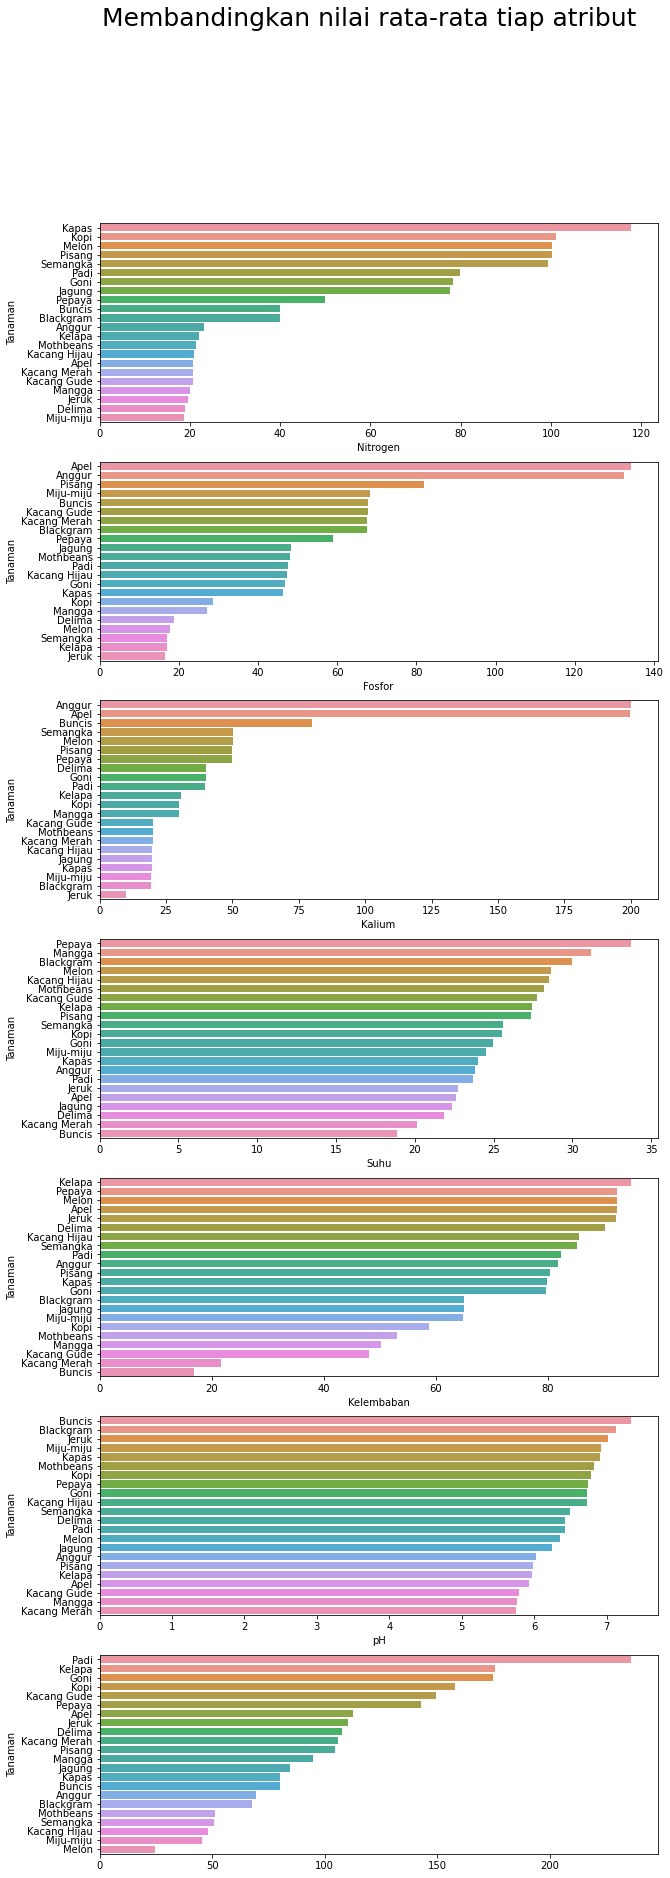

In [ ]:
fig,ax=plt.subplots(7,1,figsize=(10,30))
for index,i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped,y='Tanaman', x=i, ax=ax[index], order=grouped.sort_values(i, ascending = False).Tanaman)
    plt.suptitle("Membandingkan nilai rata-rata tiap atribut", size=25)
    plt.xlabel("")

In [ ]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'5 teratas tanaman yang membutuhkan {i}')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['Tanaman',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
5 teratas tanaman yang membutuhkan Nitrogen
--------------------------------
Kapas --> 117.77
Kopi --> 101.2
Melon --> 100.32
Pisang --> 100.23
Semangka --> 99.42
-------------------------------
5 teratas tanaman yang membutuhkan Fosfor
--------------------------------
Apel --> 134.22
Anggur --> 132.53
Pisang --> 82.01
Miju-miju --> 68.36
Buncis --> 67.79
-------------------------------
5 teratas tanaman yang membutuhkan Kalium
--------------------------------
Anggur --> 200.11
Apel --> 199.89
Buncis --> 79.92
Semangka --> 50.22
Melon --> 50.08
-------------------------------
5 teratas tanaman yang membutuhkan Suhu
--------------------------------
Pepaya --> 33.7238587388
Mangga --> 31.2087701513
Blackgram --> 29.9733396789
Melon --> 28.663065756
Kacang Hijau --> 28.5257747353
-------------------------------
5 teratas tanaman yang membutuhkan Kelembaban
--------------------------------
Kelapa --> 94.84427180610001
Pepaya --> 92.4033876826
Melon --> 92.3

# praproses

In [ ]:
names = df['Tanaman'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Tanaman'])
integer_encoded

array([18, 18, 18, ..., 13, 13, 13])

In [ ]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
# merubah ke one hot encoder
X=df.drop(['Tanaman'],axis=1)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

## ann

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


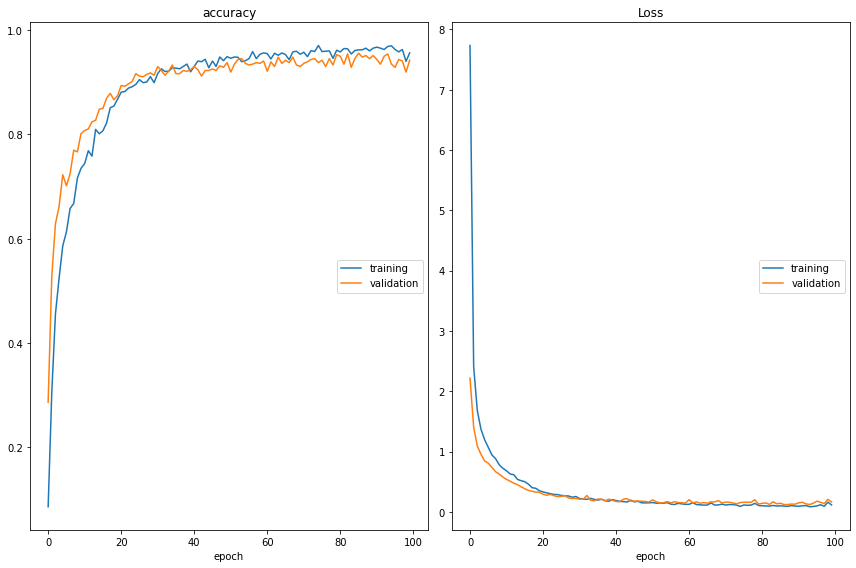

accuracy
	training         	 (min:    0.086, max:    0.971, cur:    0.956)
	validation       	 (min:    0.286, max:    0.956, cur:    0.942)
Loss
	training         	 (min:    0.084, max:    7.735, cur:    0.114)
	validation       	 (min:    0.120, max:    2.218, cur:    0.163)
49/49 [==============================] - 1s 17ms/step - loss: 0.1143 - accuracy: 0.9565 - val_loss: 0.1630 - val_accuracy: 0.9424


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense, Dropout
import warnings 
warnings.filterwarnings('ignore')
from livelossplot import PlotLossesKeras
# Sequential model
model = Sequential()

#Adding 4rd Hidden, Relu activation function
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

#Output node with softmax(best for multiclass)
model.add(Dense(22, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Checkpoiny
from keras.callbacks import ModelCheckpoint
#Buat format file penyimpanan
filepath='weights-improvement.hdf5'
#Buat Objek Cekpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
save_best_only=True, mode='max')


epochs = 100
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [checkpoint, PlotLossesKeras()], epochs=epochs)

In [ ]:
y_pred_ann = model.predict(X_test)
y_pred_ann = np.argmax(y_pred_ann, axis = 1)
y_test = np.argmax(y_test, axis = 1)

21/21 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.91      1.00      0.95        30
           2       0.88      0.93      0.90        30
           3       1.00      1.00      1.00        30
           4       0.94      1.00      0.97        30
           5       0.78      0.93      0.85        30
           6       0.80      0.80      0.80        30
           7       1.00      1.00      1.00        30
           8       0.97      1.00      0.98        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       0.81      0.87      0.84        30
          12       1.00      0.93      0.97        30
          13       1.00      0.93      0.97        30
          14       1.00      0.93      0.97        30
          15       1.00      1.00      1.00        30
          16       0.88      0.97      0.92        30
          17       1.00    

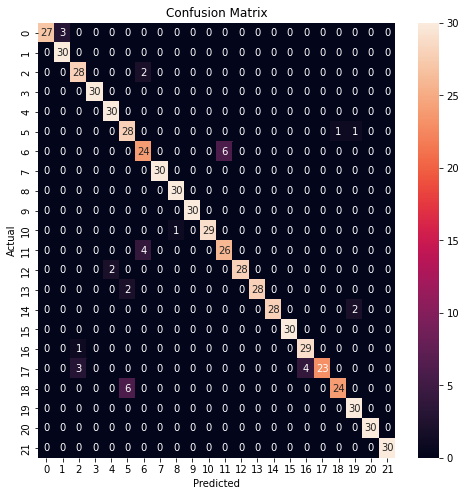

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_ann=confusion_matrix(y_test,y_pred_ann)



plt.figure(figsize=(8,8))
sns.heatmap(confusion_ann,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_ann))

## save model

In [ ]:
import pickle
with open('AgricultureRecommendation','wb') as f:
    pickle.dump(model,f)

In [ ]:
print("Inputkan data tanah untuk mendapatkan rekomendasi tanaman!")

Nitrogen = input('Jumlah kandungan Nitrogen : ')
Fosfor = input('Jumlah kandungan Fosfor : ')
Kalium = input('Jumlah kandungan Kalium : ')
Suhu = input('Suhu : ')
Humidity = input('kelembaban tanah : ')
PH = input('Kadar pH : ')
rain = input('Curah hujan : ')

# data = np.array([[Nitrogen, Fosfor, Kalium, Suhu, Humidity, PH, rain]])

prediction =model.predict([[float(Nitrogen), float(Fosfor), float(Kalium), float(Suhu), float(Humidity), float(PH), float(rain)]])
prediction = np.argmax(prediction, axis = 1)
prediction = label_encoder.inverse_transform(prediction)

print('Tanaman yang cocok ditanam yaitu : ' + prediction[0])
print('Selamat berkebun ^_^')

Inputkan data tanah untuk mendapatkan rekomendasi tanaman!
Jumlah kandungan Nitrogen : 36
Jumlah kandungan Fosfor : 24
Jumlah kandungan Kalium : 41
Suhu : 24.94467632
kelembaban tanah : 94.25702672
Kadar pH : 7.009180374
Curah hujan : 103.8799347
1/1 [==============================] - 0s 73ms/step
Tanaman yang cocok ditanam yaitu : Delima
Selamat berkebun ^_^
